In [23]:
import numpy as np
import matplotlib.pylab as plt
from random import choice
from PIL import Image

In [24]:
def load_desk():
    path = 'Maze_particle-air_x2.jpg'
    pic = np.array(Image.open(path))[:, :, 0]
    desk = np.ones(pic.shape) - np.around(pic.astype('float32')/255)
    #desk = np.zeros((4000, 4000))
    desk[-1,:] = desk[0, :] = desk[:, -1] = desk[:,0] = 1
    return desk

In [25]:
def set_init_pos(desk):
    while True:
        init_pos = [np.random.randint(low = 200, high = desk.shape[0]-200), np.random.randint(low = 200, high = desk.shape[1]-200)]
        if desk[init_pos[0], init_pos[1]] == 0:
            break
    return [desk.shape[0]//2, desk.shape[1]//2]

In [26]:
def linreg(X, Y):
    X = np.array(X); Y = np.array(Y);   
    
    b = (sum(Y)* sum(X**2) - sum(X)*sum(X*Y)) / (X.shape[0] * sum(X**2) - sum(X)**2)
    k = (X.shape[0]*sum(X*Y) - sum(X)*sum(Y)) / (X.shape[0] * sum(X**2) - sum(X)**2)
    print('y = {}x + {}'.format(round(k, 3), round(b,3)))
    
    return k, b

In [27]:
neigh_matr = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0)]

def step(pos, desk):
    global neigh_matr
    neigh = []
    
    for i in neigh_matr:
        idx = neigh_matr.index(i)
        if not desk[pos[0] + i[0], pos[1] + i[1]]:
            if (abs(int(i[0])) + abs(int(i[1])) == 2) and (
            ( not desk[pos[0] + neigh_matr[idx - 1][0], pos[1] + neigh_matr[idx - 1][1]]) or (
                not desk[pos[0] + neigh_matr[idx + 1][0], pos[1] + neigh_matr[idx + 1][1]])):
                neigh.append((i[0]+pos[0], i[1] + pos[1]))

            elif (abs(int(i[0])) + abs(int(i[1])) == 1):
                neigh.append((i[0]+pos[0], i[1] + pos[1]))

    
    next_s = choice(neigh)
    return next_s

/home/favgorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.
/home/favgorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


y = -0.0x + 1.247
y = -0.0x + 1.327
y = -0.0x + 1.168
y = -0.0x + 1.36
y = -0.0x + 1.279
y = -0.0x + 8.415
y = -0.0x + 1.143
y = -0.0x + 1.317
y = -0.0x + 1.315


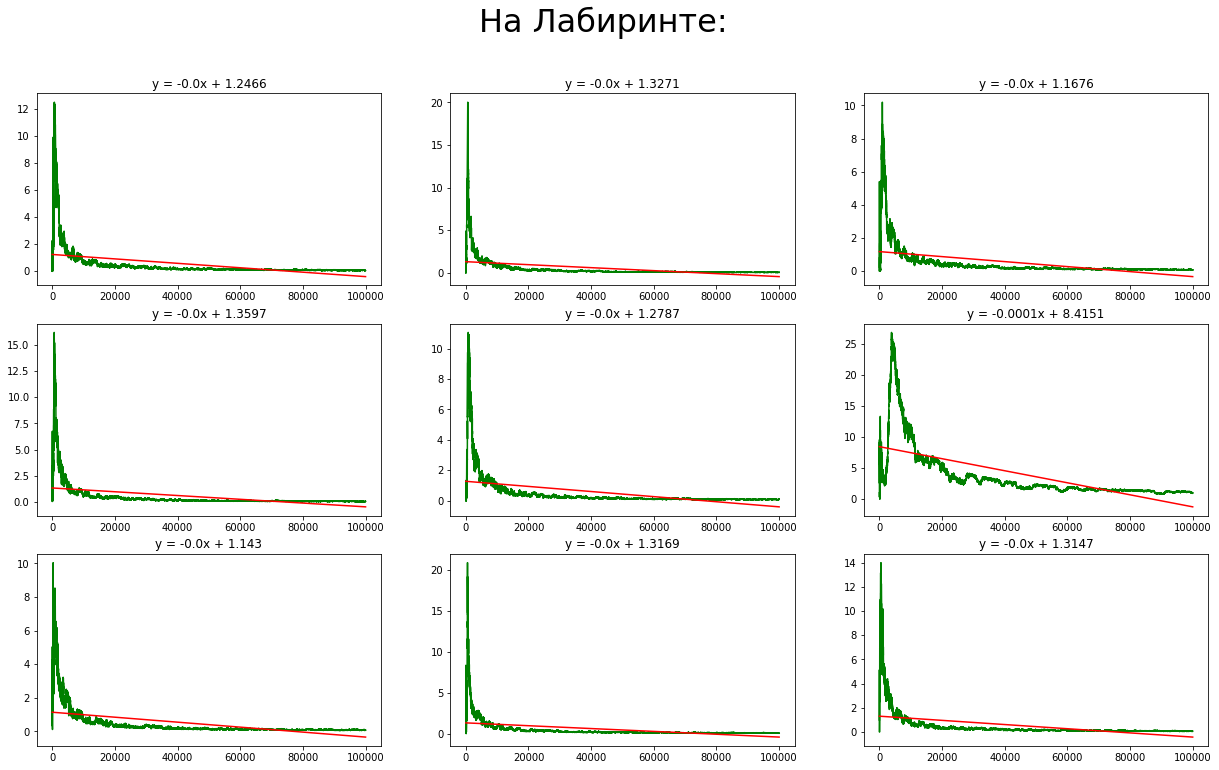

In [28]:
fig = plt.figure(figsize = (3*7, 3*4))
fig.suptitle('На Лабиринте:', fontsize=32)

for tr in range(9):

    overall_history_val = []
    desk = load_desk()
    pos = init_pos = set_init_pos(desk)
    num_iter = int(1e5)

    for j in range(1, num_iter):

        pos = step(pos, desk)
        if (pos[1] - 545) ** 2 + (pos[0] - 559) ** 2 >= 450**2: 
            num_iter = j
            break
        overall_history_val.append(sum([x - y for x,y in zip(init_pos, pos)])**2/j)

    k, b = linreg(range(1, num_iter), overall_history_val)
        
    sub = fig.add_subplot(3, 3, tr+1)
    plt.plot(range(1, num_iter), overall_history_val, 'g')
    plt.plot(range(1, num_iter), range(1, num_iter)*k + b, 'r')
    sub.title.set_text('y = {}x + {}'.format(round(k,4), round(b, 4)))

fig.show()
plt.savefig('Maze_RandomStep')